In [2]:
%reset
%load_ext autoreload
%autoreload 2
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
from pySurf.data2D_class import Data2D
from pyProfile.profile_class import Profile

In [4]:
from pyProfile.profile import *
from numpy.polynomial import polynomial as P

poly([3276.5 4900.5])


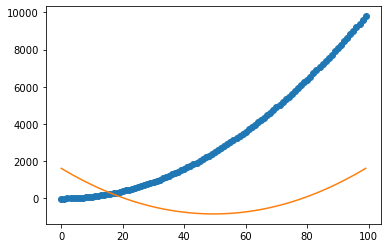

In [5]:
%matplotlib inline
x=np.arange(100)
y=x**2 -7
PP = P.Polynomial.fit(x,y,1)
print(PP)

plt.clf()
plt.plot(x,y,'o')
plt.plot(x,y-PP(x))

poly([-1624.    99.])


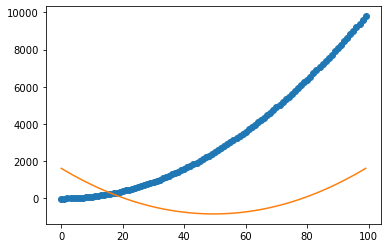

In [6]:
x=np.arange(100)
y=x**2 -7
PP = P.Polynomial.fit(x,y,1,window=span(x))
print(PP)

plt.clf()
plt.plot(x,y,'o')
plt.plot(x,y-PP(x))

poly([300.5 247.5])


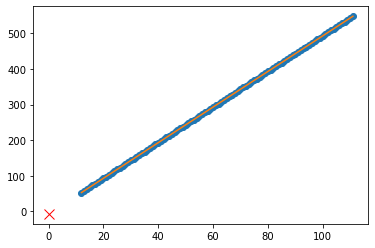

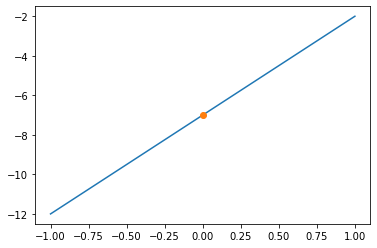

In [7]:
# in questo esempio (lineare) i plot combaciano
# ma i coefficienti non sono quelli che mi aspetterei

x = np.arange(100) + 12
y = x * 5 -7
PP = P.Polynomial.fit(x,y,1)
print(PP)

plt.figure(1)
plt.clf()
plt.plot(x,y,'o')
plt.plot(x,PP(x))
plt.plot([0],[-7],'rx',markersize=10)

plt.figure(2)
plt.clf()
xx = np.linspace(-1,1,len(x)) 
plt.plot(xx,PP(xx))
plt.plot([0],[-7],'o')

poly([-7.  5.])


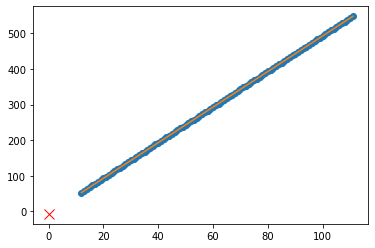

In [8]:
# plottare settando window, mantiene il fit valido, 
# ma aggiusta (?) i coefficienti.
# Tuttavia ha calcolato il fit su span(x)

y = x * 5 - 7
PP = P.Polynomial.fit(x,y,1,window=span(x))
print(PP)


plt.clf()
plt.plot(x,y,'o')
plt.plot(x,PP(x))
plt.plot([0],[-7],'rx',markersize=10)

X span: [ 12 111] N: 100


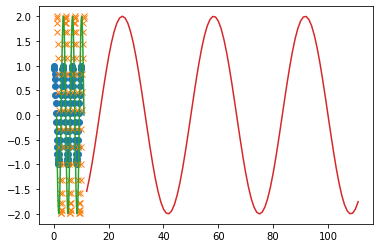

In [9]:
# test make_signal
plt.clf()

print("X span: %s N: %i"%(span(x),len(x)))
#plt.plot(*make_signal(2.,x,nwaves=3))

#plt.plot(*make_signal(1.,x,nwaves=3,phase=np.pi/2),'o')
plt.plot(*make_signal(1.,nwaves=3,L=10,N=100),'o')
plt.plot(*make_signal(2.,nwaves=3,L=[1,11],N=100),'x')
plt.plot(*make_signal(2.,nwaves=3,L=[1,11],N=100,phase=np.pi/2))
plt.plot(*make_signal(2.,x,nwaves=3,L=100,phase=np.pi/2))
#plt.plot(*make_signal(2.,nwaves=3,N=100,phase=np.pi/2))

X span: [ 12 111] N: 100


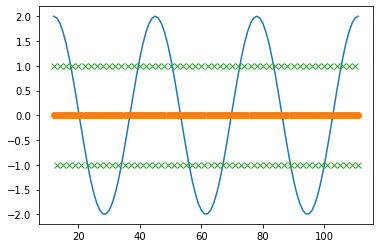

In [10]:
# test make_signal
plt.clf()

print("X span: %s N: %i"%(span(x),len(x)))
plt.plot(*make_signal(2.,x,nwaves=3))

plt.plot(*make_signal(1.,x,nwaves=3,L=2,phase=np.pi/2),'o')
plt.plot(*make_signal(1.,x,nwaves=15,L=10),'x')
#plt.plot(*make_signal(2.,nwaves=3,L=[1,11],N=100),'x')

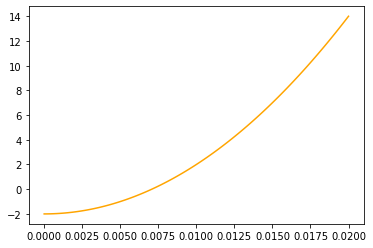

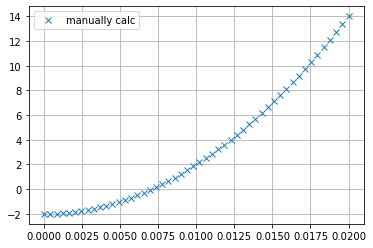

In [11]:
# questo esempio, preso da stackoverflow https://stackoverflow.com/questions/52339907/numpy-polynomial-generation/52469490
# mostra come i coefficienti vengano interpretati.
# Prima il polinomio con i dati coefficienti e' calcolato sulla `window`.
# Il risultato e' poi trasposto su `domain`.
# Per esempio nel caso seguente:

coef = [2.,8.,4.]

from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

pA = Polynomial(coef=coef, domain=[0,0.02])
plt.plot(*pA.linspace(), label="Ascending", color="orange")
plt.show()

pB = Polynomial(coef=coef)
#plt.plot(*pB.linspace(), label="natural")

xc = np.linspace(-1,1,50)  # x on which formula is calculated (window)
xx = np.linspace(0,0.02,50) # x for output (domain)
yy = coef [0]+ coef[1]*xc+ coef[2]*xc**2
plt.plot(xx , yy ,'x',label = 'manually calc')
plt.legend()
plt.grid(1)
plt.show()



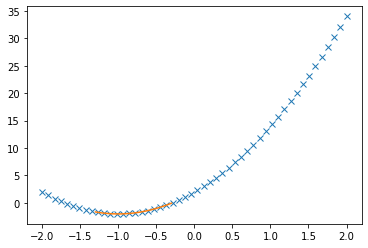

Window [-1.3,-0.3]--> Polynomial([2., 8., 4.], domain=[-1.3, -0.3], window=[-1.3, -0.3]) 
-----------



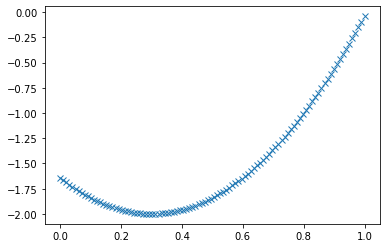

domain [0,1]--> Polynomial([2., 8., 4.], domain=[0., 1.], window=[-1.3, -0.3]) 




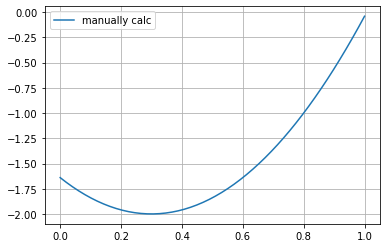

In [12]:
# qui come vengono usati window e domain

coef = [2.,8.,4.]

from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

xfull = [-2,2] #x for full analytical plot

xf = np.linspace(xfull[0],xfull[1],50) # x for analytic func
yf = coef [0]+ coef[1]*xf+ coef[2]*xf**2
plt.plot(xf , yf ,'x',label = 'manually calc')

#Show the effects of windows and domain
# Polynomial is calculated on window and mapped on domain
pA = Polynomial(coef=coef, window=[-1.3,-0.3], domain=[-1.3,-0.3])
plt.plot(*pA.linspace(), label="Window [-1.3,-0.3]")
plt.show()
print("Window [-1.3,-0.3]-->",pA.__repr__(),"\n-----------\n")

pB = Polynomial(coef=coef, window=[-1.3,-0.3], domain=[0,1])
plt.plot(*pB.linspace(), 'x', label="domain [0,1]")
plt.show()
print("domain [0,1]-->",pB.__repr__(),"\n\n")

#simulate same window and domain behavior:
xc = np.linspace(-1.3,-0.3,50)  # x on which formula is calculated (window)
xx = np.linspace(0,1,50) # x for output (domain)
yy = coef [0]+ coef[1]*xc+ coef[2]*xc**2
plt.plot(xx , yy ,label = 'manually calc')


plt.legend()
plt.grid(1)
plt.show()

Si capisce quindi che nel caso piu' ordinario assumano questo significato:
window: range su cui il polinomio base si comporta bene, ad es. Legendre e Laguerre.
domain: va settato su range di x.

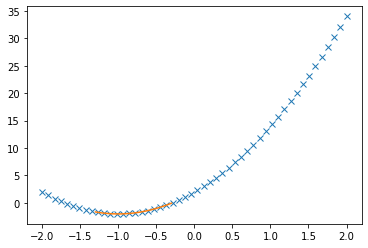

Window [-1.3,-0.3]--> Polynomial([2., 8., 4.], domain=[-1.3, -0.3], window=[-1.3, -0.3]) 
-----------



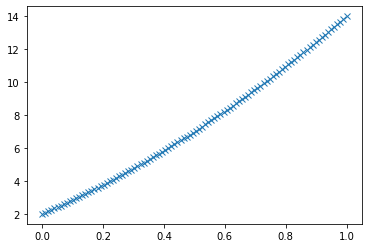

domain [0,1]--> Polynomial([2., 8., 4.], domain=[0., 1.], window=[0., 1.]) 




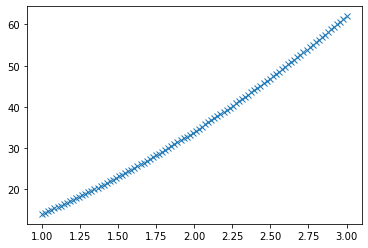

domain [1,3]--> Polynomial([14., 32., 16.], domain=[1., 3.], window=[0., 1.]) 




No handles with labels found to put in legend.


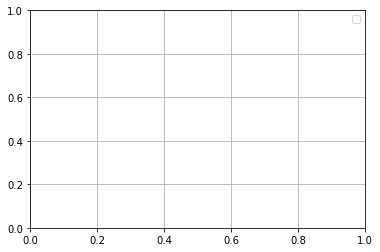

In [13]:
# Quando si costruisce un polinomio passando i coefficienti, questi sono fissati ai valori passati,
# indipendentemente da window e domain. Cio' non e' vero nel caso ad es. di un fit.
# Ad es. ci si chiede come i valori di window e domain influenzino i coefficienti risultanti dal fit.

# Vorrei dimostrare che cambiare window e domain e' equivalente a cambiare "base",
#   nel senso in cui la risultante traslazione e rescaling da' luogo a nuovi coefficienti
# nel sistema originario.

coef = [2.,8.,4.]

from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

xfull = [-2,2] #x for full analytical plot
xf = np.linspace(xfull[0],xfull[1],50) # x for analytic func
yf = coef [0]+ coef[1]*xf+ coef[2]*xf**2
plt.plot(xf , yf ,'x',label = 'manually calc')

#Show the effects of windows and domain
# Polynomial is calculated on window and mapped on domain
#pA = Polynomial(coef=coef, window=[-1.3,-0.3], domain=[-1.3,-0.3])
pA = Polynomial.fit(xf,yf,2, window=[-1.3,-0.3], domain=[-1.3,-0.3])
plt.plot(*pA.linspace(), label="fit Window [-1.3,-0.3],domain [0,1]")
plt.show()
print("Window [-1.3,-0.3]-->",pA.__repr__(),"\n-----------\n")

pB = Polynomial.fit(xf,yf,2, window=[0,1], domain=[0,1])
plt.plot(*pB.linspace(), 'x', label="domain [0,1]")
plt.show()
print("domain [0,1]-->",pB.__repr__(),"\n\n")

pC = Polynomial.fit(xf,yf,2, window=[0,1], domain=[1,3])
plt.plot(*pC.linspace(), 'x', label="domain [1,3]")
plt.show()
print("domain [1,3]-->",pC.__repr__(),"\n\n")

"""
#simulate same window and domain behavior:
xc = np.linspace(-1.3,-0.3,50)  # x on which formula is calculated (window)
xx = np.linspace(0,1,50) # x for output (domain)
yy = coef [0]+ coef[1]*xc+ coef[2]*xc**2
plt.plot(xx , yy ,label = 'manually calc')
"""

plt.legend()
plt.grid(1)
plt.show()

In [14]:
# Come funzionano i polinomi. Sono oggetti che uniscono coeff, window e domain in un unico oggetto.
#   Ammettono ad es. operazioni algebriche (incluso derivate) tra coefficienti e conversioni tra sistemi di basi.
#   Nota che perche' le operazioni algebriche siano consentite, window e domain devono corrispondere.
# Mon mi e' del tutto chiaro pero' come psasa funzionare con una traslazione in x (ad es. il vertice
# Di una parabola e' unico).

# Constructing polynomials by specifying coefficients is just one way of obtaining a polynomial instance, 
#    they may also be created by specifying their roots, by conversion from other polynomial types, 
#    and by least squares fits.

COEFF: Window [-1.3,-0.3]--> Polynomial([2., 8., 4.], domain=[-1.3, -0.3], window=[-1.3, -0.3]) 
-----------



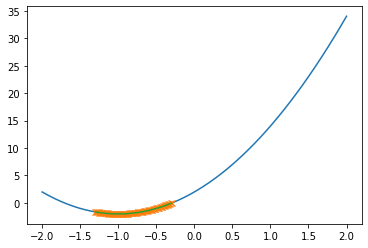

No handles with labels found to put in legend.


FIT: domain [0,1]--> Polynomial([2., 8., 4.], domain=[-1.3, -0.3], window=[-1.3, -0.3]) 




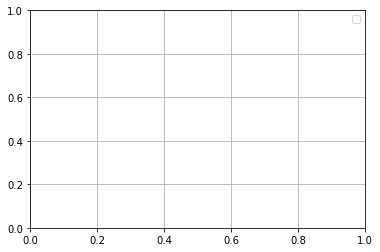

In [15]:
from numpy.polynomial import Polynomial # Can be Legendre, etc..
import matplotlib.pyplot as plt

coef = [2.,8.,4.]
xfull = [-2,2] #x for full analytical plot

xf = np.linspace(xfull[0],xfull[1],50) # x for analytic func
yf = coef [0]+ coef[1]*xf+ coef[2]*xf**2
plt.plot(xf , yf ,label = 'manually calc')

# inizializza da coefficienti
pA = Polynomial(coef=coef, window=[-1.3,-0.3], domain=[-1.3,-0.3])
plt.plot(*pA.linspace(), 'x', label="COEFF: Window [-1.3,-0.3]")
print("COEFF: Window [-1.3,-0.3]-->",pA.__repr__(),"\n-----------\n")

# inizializza da fit
pB = Polynomial.fit(xf,yf,2, window=[-1.3,-0.3], domain=[-1.3,-0.3])
plt.plot(*pB.linspace(), label="FIT: domain [0,1]")
plt.show()
print("FIT: domain [0,1]-->",pB.__repr__(),"\n\n")

plt.legend()
plt.grid(1)
plt.show()

Polynomial([ 4.98050411e-01, -7.99431819e-16, -6.15009632e+00,  7.83262856e-15,
        7.75169486e+00, -9.12953035e-15], domain=[-0.5,  0.5], window=[-1.,  1.])
Polynomial([ 4.98050411e-01, -1.59886364e-15, -2.46003853e+01,  6.26610285e-14,
        1.24027118e+02, -2.92144971e-13], domain=[-0.5,  0.5], window=[-0.5,  0.5])
Polynomial([ 2.09964894e+00, -7.48263471e+01,  6.45761165e+02, -1.98443388e+03,
        1.98443388e+03, -3.84619480e-11], domain=[-0.5,  0.5], window=[0. , 0.5])
Polynomial([ 4.98050411e-01,  3.27493669e-16, -2.46003853e-01, -4.18599267e-17,
        1.24027118e-02,  6.78143144e-19], domain=[-0.1,  0.1], window=[-1.,  1.])


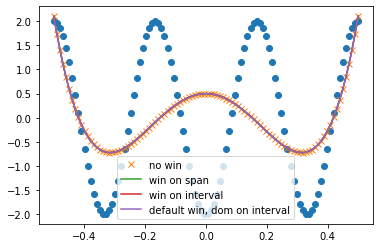

In [16]:
# proviamo con una curva piu' sensibile

from scipy import signal

x = np.linspace(-0.5,0.5,100)
freq = 3
degfit = 5

#y=np.abs(signal.sawtooth(2 * np.pi * freq * 4.5 / 5 * np.arange(len(x))/(len(x)-1))) 
#y = signal.cosine(len(x)) #not working
y = make_signal(2.,x,nwaves=freq)[1]

#y = x * 5 -7
PP = P.Polynomial.fit(x,y,degfit)
print(PP.__repr__())

PP2 = P.Polynomial.fit(x,y,degfit,window=span(x))
print(PP2.__repr__())

PP3 = P.Polynomial.fit(x,y,degfit,window=[0,0.5])
print(PP3.__repr__())

PP4 = P.Polynomial.fit(x,y,degfit,domain=[-0.1,0.1])
print(PP4.__repr__())

plt.figure(2)
plt.clf()
plt.plot(x,y,'o')
plt.plot(x,PP(x),'x',label='no win')

plt.plot(x,PP2(x),label='win on span')
plt.plot(x,PP3(x),label='win on interval')
plt.plot(x,PP4(x),label='default win, dom on interval')
plt.legend()

COEFF: Window [-1.3,-0.3]--> Polynomial([2., 8., 4.], domain=[-1.3, -0.3], window=[-1.3, -0.3]) 
-----------



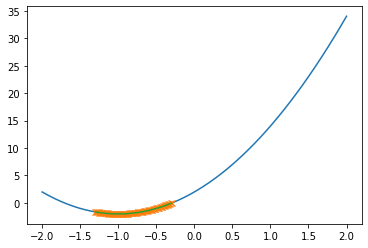

No handles with labels found to put in legend.


FIT: domain [0,1]--> Polynomial([2., 8., 4.], domain=[-1.3, -0.3], window=[-1.3, -0.3]) 




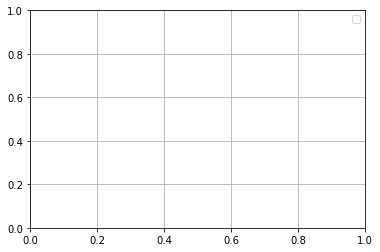

In [17]:
from numpy.polynomial import Polynomial # Can be Legendre, etc..
import matplotlib.pyplot as plt

coef = [2.,8.,4.]
xfull = [-2,2] #x for full analytical plot

xf = np.linspace(xfull[0],xfull[1],50) # x for analytic func
yf = coef [0]+ coef[1]*xf+ coef[2]*xf**2
plt.plot(xf , yf ,label = 'manually calc')

# inizializza da coefficienti
pA = Polynomial(coef=coef, window=[-1.3,-0.3], domain=[-1.3,-0.3])
plt.plot(*pA.linspace(), 'x', label="COEFF: Window [-1.3,-0.3]")
print("COEFF: Window [-1.3,-0.3]-->",pA.__repr__(),"\n-----------\n")

# inizializza da fit
pB = Polynomial.fit(xf,yf,2, window=[-1.3,-0.3], domain=[-1.3,-0.3])
plt.plot(*pB.linspace(), label="FIT: domain [0,1]")
plt.show()
print("FIT: domain [0,1]-->",pB.__repr__(),"\n\n")

plt.legend()
plt.grid(1)
plt.show()

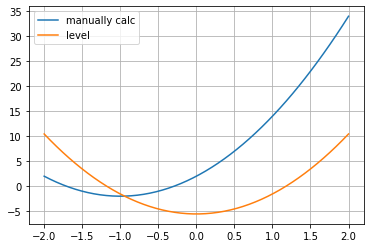

In [18]:
#test leveling:

from numpy.polynomial import Polynomial # Can be Legendre, etc..
import matplotlib.pyplot as plt

coef = [2.,8.,4.]
xfull = [-2,2] #x for full analytical plot

xf = np.linspace(xfull[0],xfull[1],50) # x for analytic func
yf = coef [0]+ coef[1]*xf+ coef[2]*xf**2
plt.plot(xf , yf ,label = 'manually calc')

yl = level_profile(xf,yf,1)[1]
plt.plot(xf , yl ,label = 'level')

"""
# inizializza da coefficienti
pA = Polynomial(coef=coef, window=[-1.3,-0.3], domain=[-1.3,-0.3])
plt.plot(*pA.linspace(), 'x', label="COEFF: Window [-1.3,-0.3]")
print("COEFF: Window [-1.3,-0.3]-->",pA.__repr__(),"\n-----------\n")

# inizializza da fit
pB = Polynomial.fit(xf,yf,2, window=[-1.3,-0.3], domain=[-1.3,-0.3])
plt.plot(*pB.linspace(), label="FIT: domain [0,1]")
plt.show()
print("FIT: domain [0,1]-->",pB.__repr__(),"\n\n")
"""

plt.legend()
plt.grid(1)
plt.show()

poly([-7.   2.5])
poly([-7.   2.5])


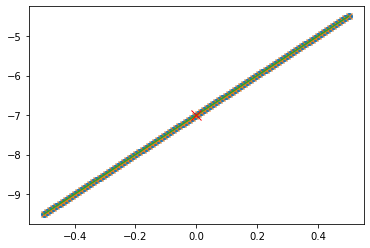

In [19]:
# degeneranza per degree = 1 ?

y = x * 5 - 7
#y=x**2 -7
PP = P.Polynomial.fit(x,y,1)
print(PP)
PP2 = P.Polynomial.fit(x,y,1,domain=[33,50])
#PP3 = P.Polynomial.fit(x,y,1,window=span(x))
print(PP)

plt.clf()
plt.plot(x,y,'o',label='raw')
plt.plot(x,PP(x),'x',label='raw')
plt.plot(x,PP2(x),label='domain [0,30]')
plt.plot([0],[-7],'rx',markersize=10,label='axis intercept')